In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

D:\Anaconda\envs\ml\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


First of all let's read preprocessed data from particular files

In [3]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [4]:
data = load_data("preprocessed_data.csv")
display(data.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customming_years,Age
0,Graduation,Single,0.357999,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.792683
1,Graduation,Single,0.285375,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.829268
2,Graduation,Together,0.440975,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0,0.666667,0.695122
3,Graduation,Together,0.164079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.463415
4,PhD,Married,0.358954,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.500000


In [5]:
manually_selected_data = load_data("manually_selected_data.csv")
display(manually_selected_data.head())

,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,Income,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Customming_years,Response
0,0.0,0.0,0.585859,0.425318,0.316522,0.357999,0.357143,0.0,0.0,0.0,0.0,1.000000,1
1,0.5,0.5,0.383838,0.007368,0.003478,0.285375,0.035714,0.0,0.0,0.0,0.0,0.333333,0
2,0.0,0.0,0.262626,0.285332,0.073623,0.440975,0.071429,0.0,0.0,0.0,0.0,0.666667,0
3,0.5,0.0,0.262626,0.007368,0.011594,0.164079,0.000000,0.0,0.0,0.0,0.0,0.333333,0
4,0.5,0.0,0.949495,0.115874,0.068406,0.358954,0.107143,0.0,0.0,0.0,0.0,0.333333,0


In [6]:
atomatically_selected_data = load_data("atomatically_selected_data.csv")
display(atomatically_selected_data.head())

,Recency,MntMeatProducts,Income,MntWines,MntGoldProds,AcceptedCmp5,Age,AcceptedCmp3,MntFishProducts,MntSweetProducts,MntFruits,NumWebVisitsMonth,NumCatalogPurchases,Response
0,0.585859,0.316522,0.357999,0.425318,0.243094,0.0,0.792683,0.0,0.664093,0.334601,0.442211,0.35,0.357143,1
1,0.383838,0.003478,0.285375,0.007368,0.016575,0.0,0.829268,0.0,0.007722,0.003802,0.005025,0.25,0.035714,0
2,0.262626,0.073623,0.440975,0.285332,0.116022,0.0,0.695122,0.0,0.428571,0.079848,0.246231,0.20,0.071429,0
3,0.262626,0.011594,0.164079,0.007368,0.013812,0.0,0.463415,0.0,0.038610,0.011407,0.020101,0.30,0.000000,0
4,0.949495,0.068406,0.358954,0.115874,0.041436,0.0,0.500000,0.0,0.177606,0.102662,0.216080,0.25,0.107143,0


We will devide columns of all three properties sets for numerical and categorical columns. Then we will create preprocess_pipeplines for all datasets 

In [7]:
data_numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
manual_data_numerical_columns = manually_selected_data.select_dtypes(include=np.number).columns.tolist()
atomatical_data_numerical_columns = atomatically_selected_data.select_dtypes(include=np.number).columns.tolist()

data_categorical_columns = ['Education', 'Marital_Status']

data_numerical_columns.remove('Response')
manual_data_numerical_columns.remove('Response')
atomatical_data_numerical_columns.remove('Response')

Let's define DataFrameSelector for the purpose of creating pipelines

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion

data_num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(data_numerical_columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

data_cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(data_categorical_columns)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

data_preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", data_num_pipeline),
        ("cat_pipeline", data_cat_pipeline),
    ])

manual_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(manual_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

atomatic_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(atomatical_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

### Division of our datasets for data and target

In [10]:
X_data = data.drop(['Response'], axis=1)
X_manual = manually_selected_data.drop(['Response'], axis=1)
X_atomatic = atomatically_selected_data.drop(['Response'], axis=1)

y_data = data['Response'].values
y_manual = manually_selected_data['Response'].values
y_atomatic = atomatically_selected_data['Response'].values

### Division  of our datasets for test and train sets

In [11]:
from sklearn.model_selection import train_test_split

X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 50)
X_manual_train, X_manual_test, y_manual_train, y_manual_test = \
            train_test_split(X_manual, y_manual, test_size = 0.4, random_state = 50)
X_atomatic_train, X_atomatic_test, y_atomatic_train, y_atomatic_test = \
            train_test_split(X_atomatic, y_atomatic, test_size = 0.4, random_state = 50)

Then we will transform out data with the preprocesse pipelines

In [12]:
data_cat_pipeline.fit_transform(X_data_train)
data_num_pipeline.fit_transform(X_data_train)

manual_preprocess_pipeline.fit_transform(X_manual_train)
atomatic_preprocess_pipeline.fit_transform(X_atomatic_train)

array([[0.94949495, 0.01681159, 0.29488845, ..., 0.        , 0.25      ,
        0.        ],
       [0.2020202 , 0.00173913, 0.25336059, ..., 0.        , 0.15      ,
        0.        ],
       [0.48484848, 0.00115942, 0.21303349, ..., 0.        , 0.4       ,
        0.        ],
       ...,
       [0.50505051, 0.10724638, 0.46739164, ..., 0.54271357, 0.15      ,
        0.21428571],
       [0.88888889, 0.10956522, 0.28801025, ..., 0.52261307, 0.4       ,
        0.28571429],
       [0.68686869, 0.08173913, 0.21672814, ..., 0.06030151, 0.4       ,
        0.03571429]])

In [13]:
X_data_train = torch.from_numpy(data_preprocess_pipeline.transform(X_data_train))
X_data_test = torch.from_numpy(data_preprocess_pipeline.transform(X_data_test))

X_manual_train = torch.from_numpy(manual_preprocess_pipeline.transform(X_manual_train))
X_manual_test = torch.from_numpy(manual_preprocess_pipeline.transform(X_manual_test))

X_atomatic_train = torch.from_numpy(atomatic_preprocess_pipeline.transform(X_atomatic_train))
X_atomatic_test = torch.from_numpy(atomatic_preprocess_pipeline.transform(X_atomatic_test))

#### We need to create our own implementation of the torch.utils.data. Dataset to have an opportunity to create DataLoaders for our datasets

In [14]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data_list, labels):
        'Initialization'
        self.labels = labels
        self.data_list = data_list

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.data_list)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Load data and get label
        X = self.data_list[index]
        y = self.labels[index]

        return X, y

###  Defining DataLoaders

In [15]:
data_training_set = Dataset(X_data_train, y_data_train)
data_training_generator = torch.utils.data.DataLoader(data_training_set, batch_size=64, shuffle=True)

data_validation_set = Dataset(X_data_test, y_data_test)
data_validation_generator = torch.utils.data.DataLoader(data_validation_set, batch_size=64, shuffle=False)

manual_training_set = Dataset(X_manual_train, y_manual_train)
manual_training_generator = torch.utils.data.DataLoader(manual_training_set, batch_size=64, shuffle=True)

manual_validation_set = Dataset(X_manual_test, y_manual_test)
manual_validation_generator = torch.utils.data.DataLoader(manual_validation_set, batch_size=64, shuffle=False)

atomatic_training_set = Dataset(X_atomatic_train, y_atomatic_train)
atomatic_training_generator = torch.utils.data.DataLoader(atomatic_training_set, batch_size=64, shuffle=True)

atomatic_validation_set = Dataset(X_atomatic_test, y_atomatic_test)
atomatic_validation_generator = torch.utils.data.DataLoader(atomatic_validation_set, batch_size=64, shuffle=False)

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Creating neural network models

In [17]:
from collections import OrderedDict

class NeuralNet1(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet1, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 25)),
          ('relu1', nn.ReLU(inplace=True)),
          ('ln2', nn.Linear(25, 5)),
          ('relu2', nn.ReLU(inplace=True)),
          ('ln3', nn.Linear(5,2)),
        ]))

model_data     = NeuralNet1(33).to(device)
model_manual   = NeuralNet1(12).to(device)
model_atomatic = NeuralNet1(13).to(device)

In [18]:
class NeuralNetBN(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetBN, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 25)),
          ('bn1', nn.BatchNorm1d(25)),
          ('relu1', nn.ReLU(inplace=True)),
          ('ln2', nn.Linear(25, 5)),
          ('bn1', nn.BatchNorm1d(5)),
          ('relu2', nn.ReLU(inplace=True)),
          ('ln2', nn.Linear(5,2)),
        ]))

model_bn_data     = NeuralNetBN(33).to(device)
model_bn_manual   = NeuralNetBN(12).to(device)
model_bn_atomatic = NeuralNetBN(13).to(device)

In [19]:
class NeuralNetDR(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetDR, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 25)),
          ('dr1', nn.Dropout(0.3)),
          ('relu1', nn.ReLU(inplace=True)),
          ('ln2', nn.Linear(25, 5)),
          ('dr2', nn.Dropout(0.3)),
          ('relu2', nn.ReLU(inplace=True)),
          ('ln2', nn.Linear(5,2)),
        ]))

model_dr_data     = NeuralNetDR(33).to(device)
model_dr_manual   = NeuralNetDR(12).to(device)
model_dr_atomatic = NeuralNetDR(13).to(device)

#### Now we will create a special class with a method containing learning loop 

While training the following metrics will be reported: \
    - loss \
    - accuracy \
    - test loss - loss on a test set \
    - test accuracy - accuracy on a test set
    - recall \
    - precision \
    - test recall \
    - test precision 

In [20]:
class TrainTestModel:
    def __init__(self, model, num_epochs = 20, learning_rate = 0.001):
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.model = model
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        self.history = {'acc':[], 'val_acc':[], 'loss':[], 'val_loss':[]}
        
    def get_history(self):
        return self.history
        
    def train(self, train_loader, test_loader):
         for epoch in range(self.num_epochs):
            
            true_positives = 0
            false_positives = 0
            false_negatives = 0
            
            all_loss = 0
            correct_answers = 0
            all_inputs = 0
            minibatches_number = 0

            for i, (customers, labels) in enumerate(train_loader):
                # Forward pass
                output = self.model(customers.float())
                loss = self.criterion(output, labels)

                # Backprpagation and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                _, predicted = torch.max(output.data, 1)
                
                actual_correct = predicted.eq(labels.data).cpu().sum()
                
                true_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==1])
                false_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==0])
                false_negatives += len([x for x, y in zip(predicted, labels) if x==0 and y==1])

                all_inputs += labels.size(0)
                correct_answers += actual_correct
                all_loss += loss.item()
                minibatches_number += 1
                
                if true_positives+false_negatives != 0:
                    recall = true_positives/(true_positives+false_negatives)
                else:
                    recall = 0
                    
                if true_positives+false_positives != 0:
                    precision = true_positives/(true_positives+false_positives)
                else:
                    precision = 0
        
                if (i+1)%10 == 0:
                    print(f'[epoch {epoch}] train loss: {all_loss / minibatches_number :.3f} | train acc: {100. * correct_answers / all_inputs :.3f}%')
                    print(f'[epoch {epoch}] recall: {recall:.3f} | precision: {precision :.3f}')
            
            self.history['acc'].append(100. * correct_answers / all_inputs)
            self.history['loss'].append(all_loss / minibatches_number)
            
            true_positives = 0
            false_positives = 0
            false_negatives = 0
            
            all_loss = 0
            correct_answers = 0
            all_inputs = 0
            minibatches_number = 0
            
            for customers, labels in test_loader:
                          
                outputs = self.model(customers.float())
                _, predicted = torch.max(outputs.data, 1)

                loss = self.criterion(outputs, labels)
                
                actual_correct = predicted.eq(labels.data).cpu().sum()
                actual_input = labels.size(0)
                
                true_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==1])
                false_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==0])
                false_negatives += len([x for x, y in zip(predicted, labels) if x==0 and y==1])
                
                if true_positives+false_negatives != 0:
                    recall = true_positives/(true_positives+false_negatives)
                else:
                    recall = 0
                    
                if true_positives+false_positives != 0:
                    precision = true_positives/(true_positives+false_positives)
                else:
                    precision = 0
                
                all_inputs += actual_input
                correct_answers += actual_correct
                all_loss += loss.item()
                minibatches_number += 1
                
                
  
            print(f'[epoch {epoch}] test loss: {all_loss/minibatches_number :.3f} | test acc: {100. * correct_answers / all_inputs :.3f}%')
            print(f'[epoch {epoch}] test recall: {recall :.3f} | test precision: {precision :.3f}')
            self.history['val_acc'].append(100. * correct_answers / all_inputs)
            self.history['val_loss'].append(all_loss / minibatches_number)
        

### Training our models

In [21]:
traintest_data = TrainTestModel(model_data)
traintest_manual = TrainTestModel(model_manual)
traintest_atomatic = TrainTestModel(model_atomatic)

traintest_bn_data = TrainTestModel(model_bn_data)
traintest_bn_manual = TrainTestModel(model_bn_manual)
traintest_bn_atomatic = TrainTestModel(model_bn_atomatic)

traintest_dr_data = TrainTestModel(model_dr_data)
traintest_dr_manual = TrainTestModel(model_dr_manual)
traintest_dr_atomatic = TrainTestModel(model_dr_atomatic)

traintest_data.train(data_training_generator, data_validation_generator)

[epoch 0] train loss: 0.661 | train acc: 78.281%
[epoch 0] recall: 0.337 | precision: 0.296
[epoch 0] train loss: 0.650 | train acc: 81.719%
[epoch 0] recall: 0.230 | precision: 0.352
[epoch 0] test loss: 0.610 | test acc: 86.289%
[epoch 0] test recall: 0.000 | test precision: 0.000
[epoch 1] train loss: 0.594 | train acc: 85.938%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.588 | train acc: 84.688%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] test loss: 0.534 | test acc: 86.438%
[epoch 1] test recall: 0.000 | test precision: 0.000
[epoch 2] train loss: 0.535 | train acc: 83.594%
[epoch 2] recall: 0.000 | precision: 0.000
[epoch 2] train loss: 0.518 | train acc: 84.062%
[epoch 2] recall: 0.000 | precision: 0.000
[epoch 2] test loss: 0.456 | test acc: 86.438%
[epoch 2] test recall: 0.000 | test precision: 0.000
[epoch 3] train loss: 0.468 | train acc: 83.906%
[epoch 3] recall: 0.000 | precision: 0.000
[epoch 3] train loss: 0.455 | train acc: 84.375%
[epoch 

In [22]:
traintest_manual.train(manual_training_generator, manual_validation_generator)

[epoch 0] train loss: 0.831 | train acc: 16.094%
[epoch 0] recall: 1.000 | precision: 0.161
[epoch 0] train loss: 0.817 | train acc: 15.781%
[epoch 0] recall: 1.000 | precision: 0.158
[epoch 0] test loss: 0.790 | test acc: 13.966%
[epoch 0] test recall: 0.992 | test precision: 0.138
[epoch 1] train loss: 0.765 | train acc: 18.125%
[epoch 1] recall: 0.982 | precision: 0.170
[epoch 1] train loss: 0.755 | train acc: 19.297%
[epoch 1] recall: 0.880 | precision: 0.149
[epoch 1] test loss: 0.728 | test acc: 28.715%
[epoch 1] test recall: 0.718 | test precision: 0.129
[epoch 2] train loss: 0.708 | train acc: 40.000%
[epoch 2] recall: 0.549 | precision: 0.142
[epoch 2] train loss: 0.697 | train acc: 46.875%
[epoch 2] recall: 0.387 | precision: 0.121
[epoch 2] test loss: 0.670 | test acc: 66.816%
[epoch 2] test recall: 0.194 | test precision: 0.109
[epoch 3] train loss: 0.660 | train acc: 70.781%
[epoch 3] recall: 0.139 | precision: 0.138
[epoch 3] train loss: 0.645 | train acc: 76.641%
[epoch 

In [23]:
traintest_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.650 | train acc: 82.500%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.641 | train acc: 84.062%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] test loss: 0.623 | test acc: 86.145%
[epoch 0] test recall: 0.000 | test precision: 0.000
[epoch 1] train loss: 0.619 | train acc: 84.375%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.613 | train acc: 84.219%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] test loss: 0.592 | test acc: 86.145%
[epoch 1] test recall: 0.000 | test precision: 0.000
[epoch 2] train loss: 0.588 | train acc: 85.000%
[epoch 2] recall: 0.000 | precision: 0.000
[epoch 2] train loss: 0.582 | train acc: 84.531%
[epoch 2] recall: 0.000 | precision: 0.000
[epoch 2] test loss: 0.559 | test acc: 86.145%
[epoch 2] test recall: 0.000 | test precision: 0.000
[epoch 3] train loss: 0.565 | train acc: 83.438%
[epoch 3] recall: 0.000 | precision: 0.000
[epoch 3] train loss: 0.553 | train acc: 84.062%
[epoch 

### Simple neural network architecture summary

Predictably, the model trained on the dataset with all parameters performed best. It's test accuracy was 90.462% , loss - 0.267. We can see an unsatisfactory recall level 0.385, but precision is much more better - 0.814. Let me draw your attention to the fact that precision is more important metric, this is due to the fact that we expect to have more false positives (customers who do not respond to marketing but will be positively marked by the network) than false negatives (customers who would accept the offer but were not marked positively by the network\ 


However, the model trained on manually selected data surprisingly turned out to be better than the one learned on automatically selected data.\

"Manual" results: 
- test acc: 88.045% 
- test loss: 0.351 
- test recall: 0.194 
- test precision: 0.774 

"Automatic" results: 
- test acc: 86.704% 
- test loss: 0.348 
- test recall: 0.048 
- test precision: 0.857 

However, on that models we can see worser recall levels, which are extremely unsatisfactory. 

In [24]:
traintest_bn_data.train(data_training_generator, data_validation_generator)
traintest_bn_manual.train(manual_training_generator, manual_validation_generator)
traintest_bn_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.726 | train acc: 44.219%
[epoch 0] recall: 0.571 | precision: 0.161
[epoch 0] train loss: 0.712 | train acc: 46.797%
[epoch 0] recall: 0.528 | precision: 0.149
[epoch 0] test loss: 0.661 | test acc: 57.228%
[epoch 0] test recall: 0.429 | test precision: 0.142
[epoch 1] train loss: 0.662 | train acc: 62.031%
[epoch 1] recall: 0.402 | precision: 0.214
[epoch 1] train loss: 0.633 | train acc: 67.422%
[epoch 1] recall: 0.433 | precision: 0.231
[epoch 1] test loss: 0.590 | test acc: 75.708%
[epoch 1] test recall: 0.330 | test precision: 0.227
[epoch 2] train loss: 0.581 | train acc: 78.125%
[epoch 2] recall: 0.293 | precision: 0.265
[epoch 2] train loss: 0.567 | train acc: 79.922%
[epoch 2] recall: 0.275 | precision: 0.302
[epoch 2] test loss: 0.534 | test acc: 83.756%
[epoch 2] test recall: 0.231 | test precision: 0.350
[epoch 3] train loss: 0.536 | train acc: 81.406%
[epoch 3] recall: 0.200 | precision: 0.375
[epoch 3] train loss: 0.523 | train acc: 82.812%
[epoch 

[epoch 8] test loss: 0.454 | test acc: 87.598%
[epoch 8] test recall: 0.379 | test precision: 0.580
[epoch 9] train loss: 0.477 | train acc: 83.281%
[epoch 9] recall: 0.283 | precision: 0.438
[epoch 9] train loss: 0.457 | train acc: 86.016%
[epoch 9] recall: 0.320 | precision: 0.569
[epoch 9] test loss: 0.426 | test acc: 88.156%
[epoch 9] test recall: 0.355 | test precision: 0.629
[epoch 10] train loss: 0.438 | train acc: 85.469%
[epoch 10] recall: 0.289 | precision: 0.538
[epoch 10] train loss: 0.434 | train acc: 85.625%
[epoch 10] recall: 0.277 | precision: 0.557
[epoch 10] test loss: 0.402 | test acc: 88.715%
[epoch 10] test recall: 0.331 | test precision: 0.695
[epoch 11] train loss: 0.411 | train acc: 86.562%
[epoch 11] recall: 0.307 | precision: 0.660
[epoch 11] train loss: 0.414 | train acc: 86.484%
[epoch 11] recall: 0.295 | precision: 0.648
[epoch 11] test loss: 0.382 | test acc: 88.827%
[epoch 11] test recall: 0.323 | test precision: 0.714
[epoch 12] train loss: 0.393 | train

[epoch 17] test loss: 0.343 | test acc: 86.704%
[epoch 17] test recall: 0.266 | test precision: 0.541
[epoch 18] train loss: 0.352 | train acc: 85.938%
[epoch 18] recall: 0.309 | precision: 0.566
[epoch 18] train loss: 0.359 | train acc: 86.250%
[epoch 18] recall: 0.299 | precision: 0.632
[epoch 18] test loss: 0.338 | test acc: 86.480%
[epoch 18] test recall: 0.250 | test precision: 0.525
[epoch 19] train loss: 0.368 | train acc: 85.156%
[epoch 19] recall: 0.276 | precision: 0.604
[epoch 19] train loss: 0.353 | train acc: 86.172%
[epoch 19] recall: 0.291 | precision: 0.641
[epoch 19] test loss: 0.334 | test acc: 86.592%
[epoch 19] test recall: 0.266 | test precision: 0.532


### Neural network with normalisation architecture summary

On that architecture we used BatchNormalisation, except of that the architecture is identical to the previously tested one

As well as in the previous case, the model trained on the dataset with all parameters performed best. Its test accuracy was 89.866% , loss - 0.265. We see that the recall / precision values are more even, but at an unsatisfactory level. Recall - 0.462, precision - 0.689


the other two models performed almost identically to the previous results. Manual selection remains to show better results. But, we can see that the recall/precision values in this case have deteriorated significantly in the case of automatically selected data.

"Manual" results: 
- test acc: 88.827% 
- test loss: 0.302 
- test recall: 0.298 
- test precision: 0.740

"Automatic" results: 
- test acc: 86.592% 
- test loss: 0.334 
- test recall: 0.266 
- test precision: 0.532 


In [25]:
traintest_dr_data.train(data_training_generator, data_validation_generator)
traintest_dr_manual.train(manual_training_generator, manual_validation_generator)
traintest_dr_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.807 | train acc: 16.875%
[epoch 0] recall: 0.990 | precision: 0.164
[epoch 0] train loss: 0.787 | train acc: 20.000%
[epoch 0] recall: 0.914 | precision: 0.160
[epoch 0] test loss: 0.724 | test acc: 40.835%
[epoch 0] test recall: 0.736 | test precision: 0.152
[epoch 1] train loss: 0.706 | train acc: 45.625%
[epoch 1] recall: 0.647 | precision: 0.175
[epoch 1] train loss: 0.683 | train acc: 53.359%
[epoch 1] recall: 0.541 | precision: 0.181
[epoch 1] test loss: 0.610 | test acc: 73.920%
[epoch 1] test recall: 0.154 | test precision: 0.125
[epoch 2] train loss: 0.613 | train acc: 74.531%
[epoch 2] recall: 0.193 | precision: 0.219
[epoch 2] train loss: 0.588 | train acc: 76.172%
[epoch 2] recall: 0.152 | precision: 0.190
[epoch 2] test loss: 0.528 | test acc: 81.073%
[epoch 2] test recall: 0.099 | test precision: 0.167
[epoch 3] train loss: 0.521 | train acc: 80.156%
[epoch 3] recall: 0.124 | precision: 0.333
[epoch 3] train loss: 0.500 | train acc: 82.266%
[epoch 

[epoch 8] test loss: 0.401 | test acc: 86.145%
[epoch 8] test recall: 0.000 | test precision: 0.000
[epoch 9] train loss: 0.419 | train acc: 84.375%
[epoch 9] recall: 0.000 | precision: 0.000
[epoch 9] train loss: 0.418 | train acc: 84.141%
[epoch 9] recall: 0.000 | precision: 0.000
[epoch 9] test loss: 0.396 | test acc: 86.145%
[epoch 9] test recall: 0.000 | test precision: 0.000
[epoch 10] train loss: 0.402 | train acc: 84.531%
[epoch 10] recall: 0.000 | precision: 0.000
[epoch 10] train loss: 0.404 | train acc: 84.375%
[epoch 10] recall: 0.000 | precision: 0.000
[epoch 10] test loss: 0.377 | test acc: 86.145%
[epoch 10] test recall: 0.000 | test precision: 0.000
[epoch 11] train loss: 0.412 | train acc: 83.906%
[epoch 11] recall: 0.000 | precision: 0.000
[epoch 11] train loss: 0.406 | train acc: 84.297%
[epoch 11] recall: 0.000 | precision: 0.000
[epoch 11] test loss: 0.380 | test acc: 86.145%
[epoch 11] test recall: 0.000 | test precision: 0.000
[epoch 12] train loss: 0.365 | train

[epoch 17] train loss: 0.423 | train acc: 84.141%
[epoch 17] recall: 0.000 | precision: 0.000
[epoch 17] test loss: 0.388 | test acc: 86.145%
[epoch 17] test recall: 0.000 | test precision: 0.000
[epoch 18] train loss: 0.417 | train acc: 84.062%
[epoch 18] recall: 0.000 | precision: 0.000
[epoch 18] train loss: 0.413 | train acc: 84.141%
[epoch 18] recall: 0.000 | precision: 0.000
[epoch 18] test loss: 0.393 | test acc: 86.145%
[epoch 18] test recall: 0.000 | test precision: 0.000
[epoch 19] train loss: 0.403 | train acc: 85.156%
[epoch 19] recall: 0.000 | precision: 0.000
[epoch 19] train loss: 0.413 | train acc: 84.062%
[epoch 19] recall: 0.000 | precision: 0.000
[epoch 19] test loss: 0.380 | test acc: 86.145%
[epoch 19] test recall: 0.000 | test precision: 0.000


### Neural network with dropout architecture summary

On that architecture we used Dropout, except of that the architecture is identical to the first one

As well as in the previous cases, the model trained on the dataset with all parameters performed best. Its test accuracy was 88.972% , loss - 0.329. We see that the recall / precision values are the best here. Recall - 0.231, precision - 0.840


The other two models as expected performed almost identically to the previous results. Manual selection remains to show better results. Its accuracy is here identical to those with all features. 

"Manual" results: 
- test acc: 88.380%
- test loss: 0.347 
- test recall: 0.194
- test precision: 0.857

"Automatic" results: 
- test acc: 86.145% 
- test loss: 0.380 
- test recall: 0.266 
- test precision: 0.532 

In [26]:
history_data = traintest_data.get_history()
history_manual = traintest_manual.get_history()
history_atomatic = traintest_atomatic.get_history()

history_bn_data = traintest_bn_data.get_history()
history_bn_manual = traintest_bn_manual.get_history()
history_bn_atomatic = traintest_bn_atomatic.get_history()

history_dr_data = traintest_dr_data.get_history()
history_dr_manual = traintest_dr_manual.get_history()
history_dr_atomatic = traintest_dr_atomatic.get_history()

### Let's also pay our attention to the plots of loss and accuracy values during training

##### Simple fully connected architecture loss 

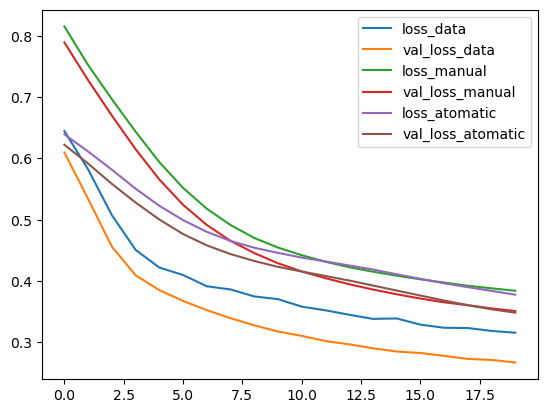

In [27]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

##### Simple fully connected architecture accuracy

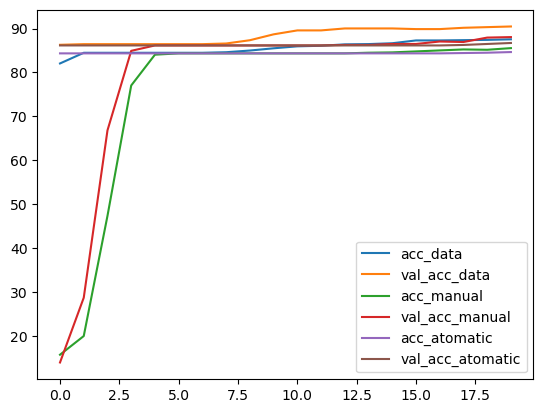

In [28]:
plt.plot(pd.DataFrame(history_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()

##### Fully connected architecture with batch normalization loss 

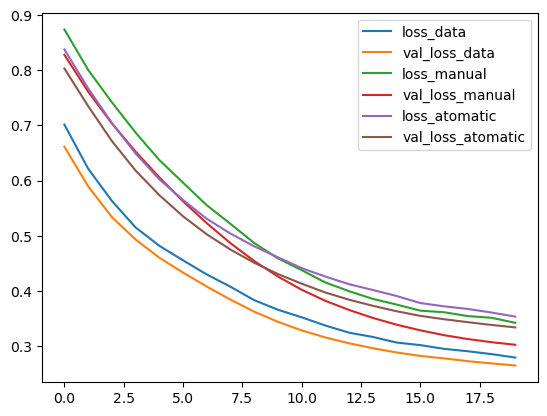

In [29]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_bn_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_bn_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_bn_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_bn_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_bn_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_bn_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

##### Fully connected architecture with batch normalization accuracy

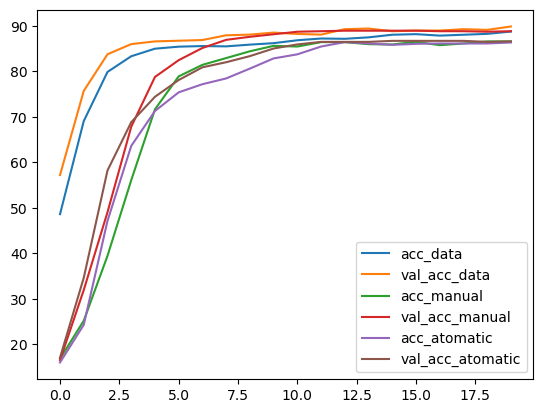

In [30]:
plt.plot(pd.DataFrame(history_bn_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_bn_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_bn_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_bn_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_bn_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_bn_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()

##### Fully connected architecture with dropout loss 

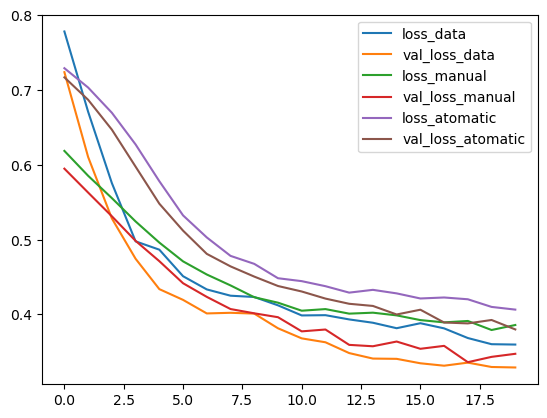

In [31]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_dr_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_dr_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_dr_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_dr_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_dr_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_dr_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

##### Fully connected architecture with dropout accuracy

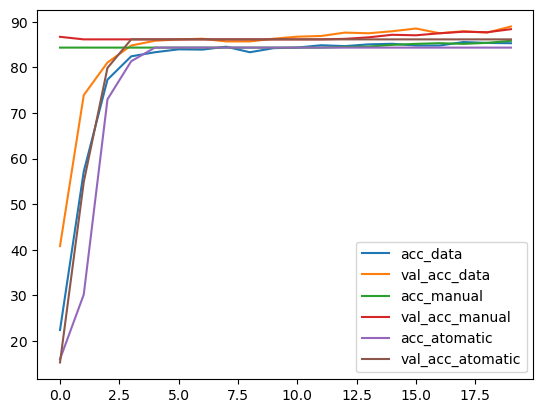

In [32]:
plt.plot(pd.DataFrame(history_dr_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_dr_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_dr_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_dr_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_dr_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_dr_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()